In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib 

Using matplotlib backend: TkAgg


In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:50% !important;height: 50% !important;}</style>"
HTML(style)

In [4]:
iris_dataset = pd.read_csv("../datasets/iris/train_iris.csv")
iris_dataset.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [5]:
iris_dataset.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [6]:
X = iris_dataset.drop(['species'], axis=1)
y = iris_dataset.species

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [9]:
max_depth_values = range(1, 100)

In [10]:
scores_data = pd.DataFrame()

In [11]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [12]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.716418,0.666667
0,2,1.000000,1.000000
0,3,1.000000,1.000000
0,4,1.000000,0.969697
0,5,1.000000,1.000000


In [13]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score','test_score'],
                           var_name ='set_type',
                           value_name='score')

In [14]:
scores_data_long.head(20)

,max_depth,set_type,score
0,1,train_score,0.716418
1,2,train_score,1.000000
2,3,train_score,1.000000
3,4,train_score,1.000000
4,5,train_score,1.000000
5,6,train_score,1.000000
6,7,train_score,1.000000
7,8,train_score,1.000000
8,9,train_score,1.000000
9,10,train_score,1.000000


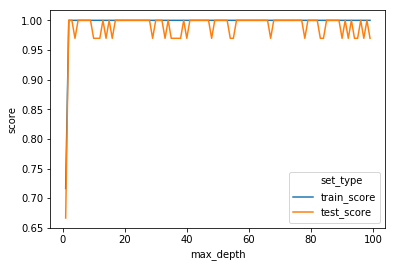

In [15]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)